
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.shiluv-bodymind.co.il%2Fwp-content%2Fuploads%2Fcompassion-banner.jpg&f=1&nofb=1" alt="Girl in a jacket" style="width:1000px">



The **hypothesis-testing** process is a logical sequence of steps to
conduct the statistical analyses in a quantitative research study. Indeed,
hypothesis testing is the most widely used statistical tool in scientific
research. However, we must remember that **no method,
including obtaining statistical results from hypothesis testing, is the absolute final
answer to a research problem**. As Snedecor and Cochran (1967) stated: 

*But the basic ideas in statistics assist us in thinking clearly about the problem, provide
some guidance about the conditions that must be satisfied if sound inferences are
to be made, and enable us to detect many inferences that have not good logical
foundation”*

**Dependent t-Test**
A comparison is made between two sets of dependent scores when a dependent
t-test (paired-sample t-test) is used. The pairs of scores between the two sets are
linked together. A dependent t-test is used in the following four situations.

1. A comparison of the pretest and posttest scores of the same participants.
2. A comparison of the scores of one group of participants with another group
of participants who are matched on one or more extraneous variables.
3. A comparison of the scores of the same group of participants under two
different conditions.
4. A comparison of the scores of naturally occurring correlated pairs, like twins.

We will illustrate the use of the dependent t-test related to research that
compares pretest scores with posttest scores on self-compassion from the same
16 participants who received a mindfulness treatment program. Self-compassion
is measured by the Self-Compassion Scale (SCS; Neff, 2003), and high scores
reflect higher self-compassion.

In [1]:
comp.data.w<-read.csv("selfcompasion_w.csv")
comp.data<-read.csv("selfcompasion.csv")

In [2]:
head(comp.data,3)
head(comp.data.w,3)

,ID,selfcompasion,period
,<int>,<int>,<chr>
1,1,65,pretest
2,2,106,pretest
3,3,45,pretest


,ID,Pretest,Posttest
,<int>,<int>,<int>
1,1,65,114
2,2,106,120
3,3,45,74


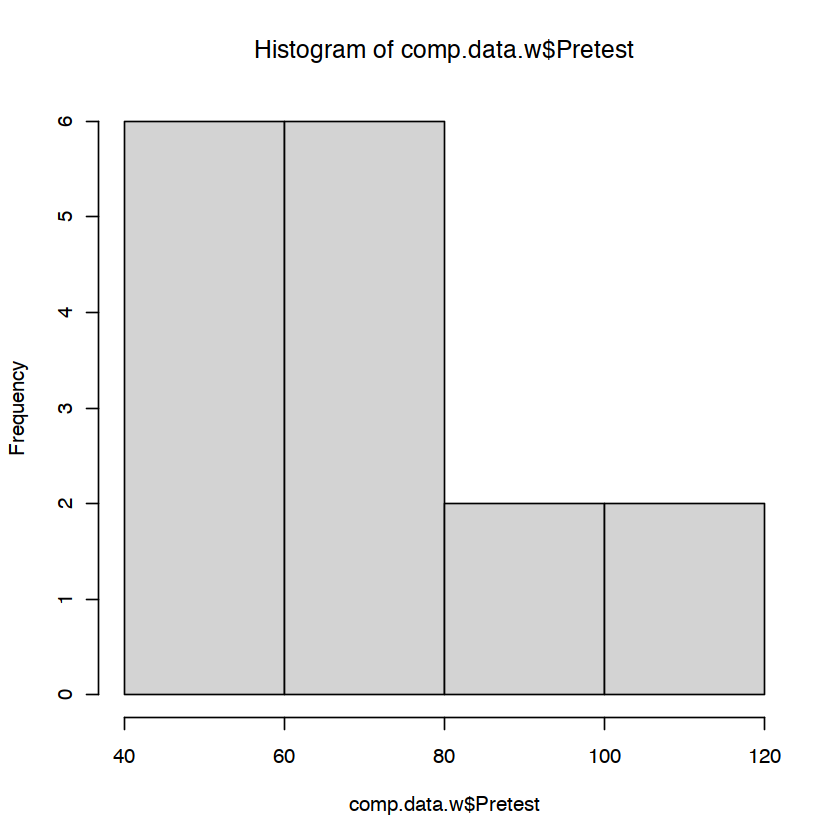


	Shapiro-Wilk normality test

data:  comp.data.w$Pretest
W = 0.93057, p-value = 0.2489



	Shapiro-Wilk normality test

data:  comp.data.w$Posttest
W = 0.97321, p-value = 0.8875


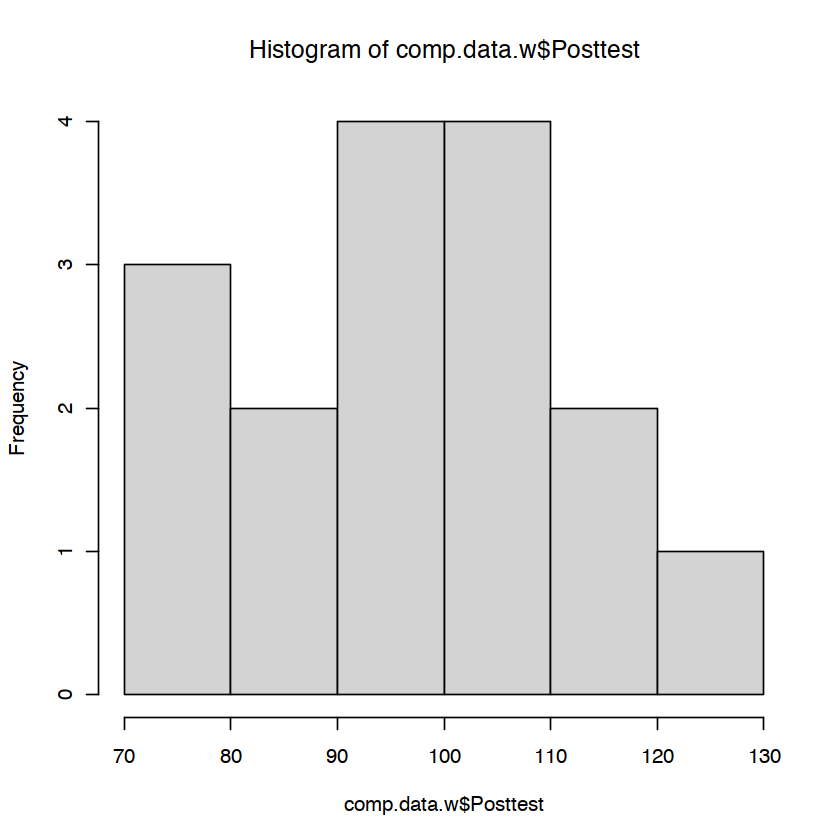

In [29]:
hist(comp.data.w$Pretest)
hist(comp.data.w$Posttest)
shapiro.test(comp.data.w$Pretest)
shapiro.test(comp.data.w$Posttest)

The calculated dependent t¼6.09 is greater than the tCV 6 2.131, so the
null hypothesis is rejected and we conclude that there is a significant difference
between the pretest and posttest self-compassion scores. The pretest X pre ¼ 71:75
and the posttest X post ¼ 97:88. Since a high score represents higher self-compassion,
we conclude that there was a significant gain in self-compassion following the
mindfulness treatment.

In [25]:
t.test(selfcompasion~period,data=comp.data,paired = T)


	Paired t-test

data:  selfcompasion by period
t = 6.092, df = 15, p-value = 2.061e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 16.98443 35.26557
sample estimates:
mean of the differences 
                 26.125 


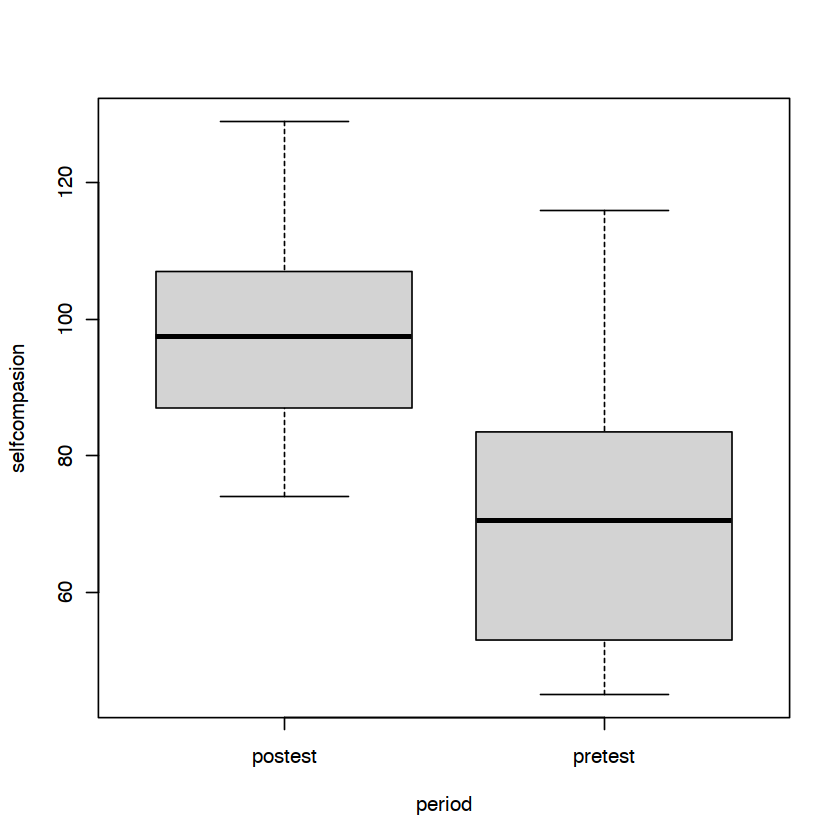

In [8]:
boxplot(selfcompasion~period,data=comp.data)

In [48]:
pre.sd<-sd(comp.data.w$Pretest)
post.sd<-sd(comp.data.w$Posttest)
pre.se<-pre.sd/sqrt(16)
post.se<-post.sd/sqrt(16)
pre.downCI<-mean(comp.data.w$Pretest)-1.96*pre.se
pre.upCI<-mean(comp.data.w$Pretest)+1.96*pre.se
pre.downCI
pre.upCI
post.downCI<-mean(comp.data.w$Posttest)-1.96*post.se
post.upCI<-mean(comp.data.w$Posttest)+1.96*post.se
post.downCI
post.upCI

[1] 61.10823

[1] 82.39177

[1] 90.2045

[1] 105.5455

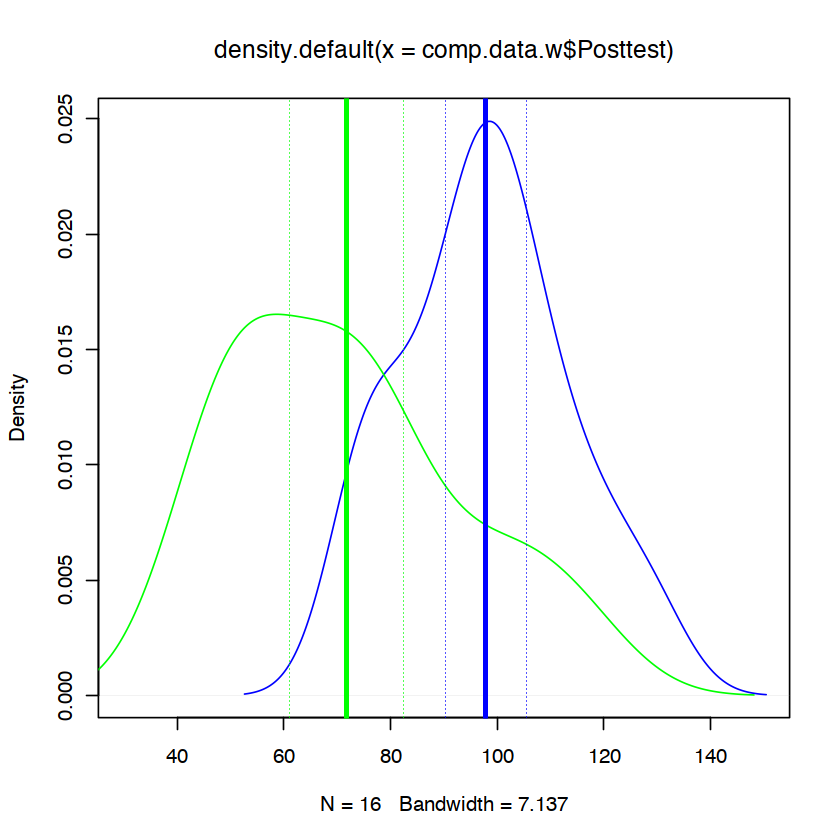

In [49]:
plot(density(comp.data.w$Posttest),col="blue",xlim=c(30,150))
lines(density(comp.data.w$Pretest),col="green")
abline(v=mean(comp.data.w$Posttest),col="blue",lwd=3)
abline(v=mean(comp.data.w$Pretest),col="green",lwd=3)
abline(v=c(pre.downCI,pre.upCI),col="green",lwd=0.5,lty=3)
abline(v=c(post.downCI,post.upCI),col="blue",lwd=0.5,lty=3)

In [34]:
comp.data.w$d<-comp.data.w$Pretest-comp.data.w$Posttest

In [35]:
comp.data.w$d2<-(comp.data.w$d)^2

In [50]:
mean.d<-mean(comp.data.w$d)
sd.d<-sd(comp.data.w$d)
se.d<-sd.d/sqrt(16)

[1] -26.125

[1] -34.53032

[1] -17.71968

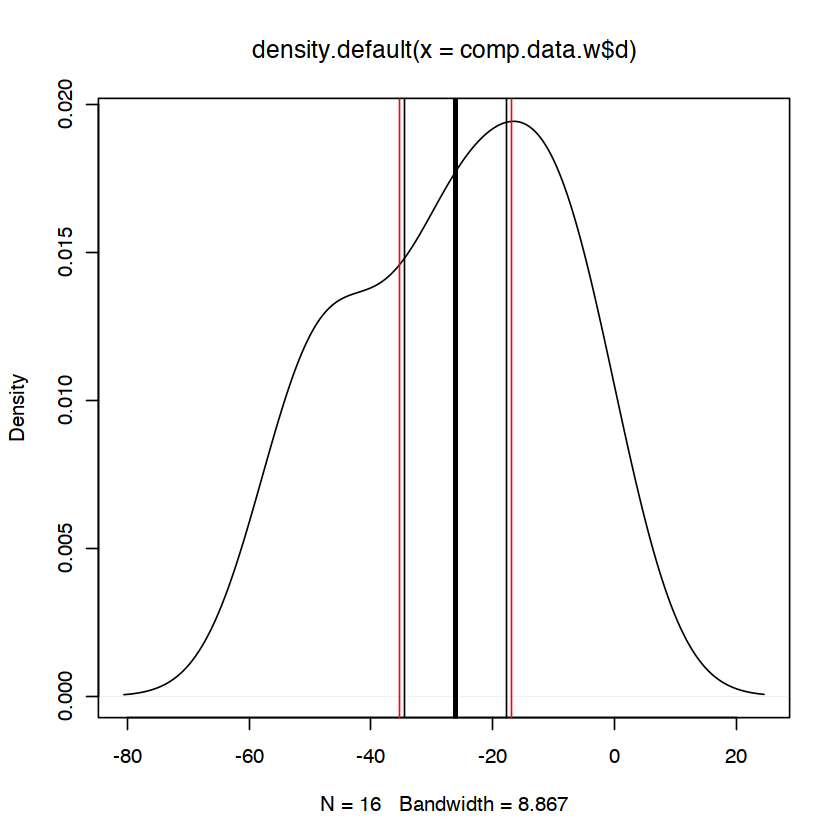

In [52]:
plot(density(comp.data.w$d))
abline(v=mean.d,lwd=3)
abline(v=mean.d-(1.96*se.d))
abline(v=mean.d+(1.96*se.d))
mean.d
mean.d-1.96*se.d
mean.d+1.96*se.d
abline(v=-16.98443,col="red")
abline(v=-35.26557,col="red")

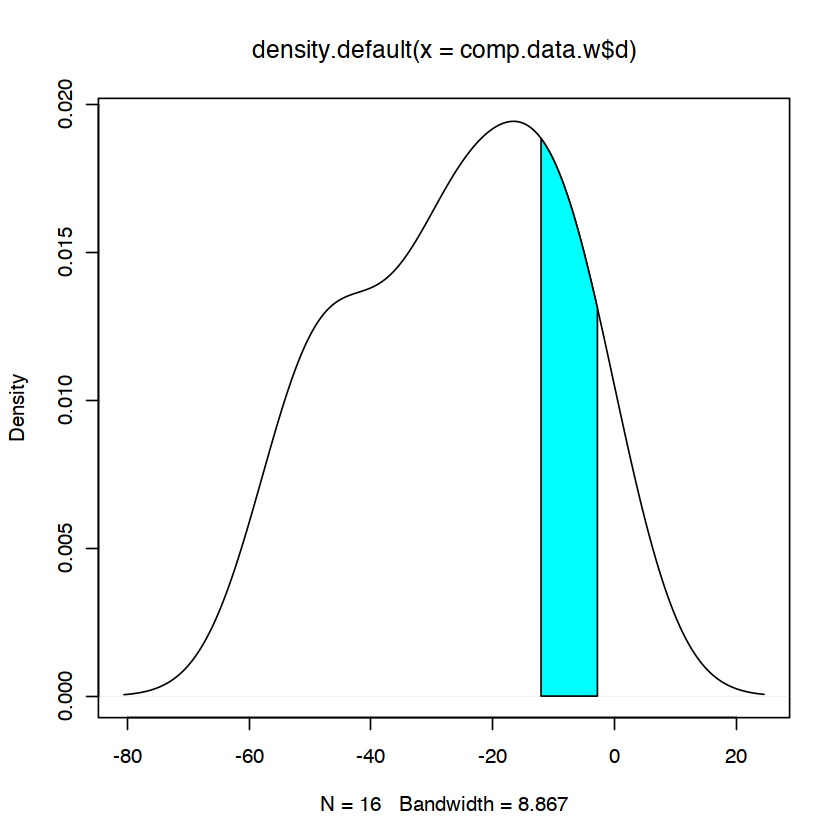

In [53]:
dens <- density(comp.data.w$d)
plot(dens)
q75 <- quantile(comp.data.w$d, .75)
q95 <- quantile(comp.data.w$d, .95)
x1 <- min(which(dens$x >= q75))  
x2 <- max(which(dens$x <  q95))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="cyan"))
#sounds cool, but to do this I should know to which quantile belongs the SE

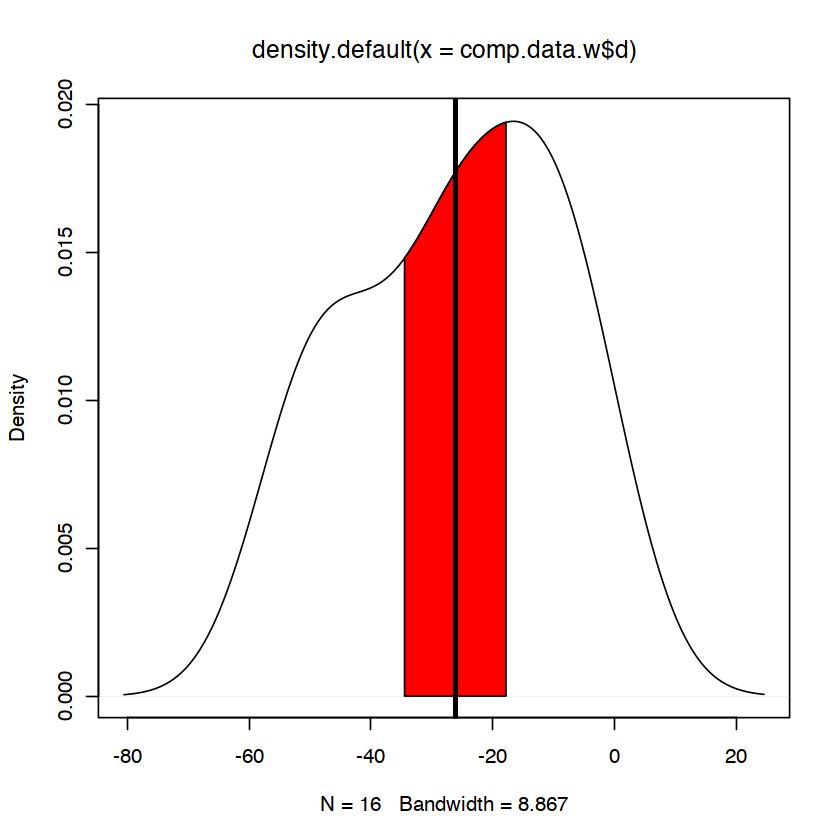

In [56]:
#o yes!!!
dens <- density(comp.data.w$d)
plot(dens)
x1 <- min(which(dens$x >= mean.d-(1.96*se.d)))  
x2 <- max(which(dens$x <  mean.d+(1.96*se.d)))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="red"))
abline(v=mean.d,lwd=3)